<a href="https://colab.research.google.com/github/KSY1526/myblog/blob/master/_notebooks/2021-12-28-TimeSeries2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "[시계열분석] 2. ARIMA"
- author: Seong Yeon Kim 
- categories: [book, jupyter, TimeSeries, R, ARIMA] 
- image: images/211228.png

# 데이터 불러오기

In [1]:
install.packages("TTR")
install.packages("forecast")
install.packages("tseries")
library(TTR)
library(forecast)
library(tseries)

data <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")
birth <- ts(data, frequency = 12, start = c(1946, 1))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



필요한 패키지들을 설치하고, '뉴욕 월별 출생자수' 데이터를 입력받습니다.

ts 함수를 쓰면 보다 편리하게 원 자료를 시계열 자료로 변환이 가능합니다.

In [6]:
data

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
 [11] 21.672 21.870 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824
 [21] 23.105 23.110 21.759 22.073 21.937 20.035 23.590 21.672 22.222 22.123
 [31] 23.950 23.504 22.238 23.142 21.059 21.573 21.548 20.000 22.424 20.615
 [41] 21.761 22.874 24.104 23.748 23.262 22.907 21.519 22.025 22.604 20.894
 [51] 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252 22.084 22.991
 [61] 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
 [71] 22.964 23.981 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816
 [81] 25.210 25.199 23.162 24.707 24.364 22.644 25.565 24.062 25.431 24.635
 [91] 27.009 26.606 26.268 26.462 25.246 25.180 24.657 23.304 26.982 26.199
[101] 27.210 26.122 26.706 26.878 26.152 26.379 24.712 25.688 24.990 24.239
[111] 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784 25.693 26.881
[121] 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
[131] 26.291 26.987 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141
[141] 29.048 28.484 26.634 27.735 27.132 24.924 28.963 26.589 27.931 28.009
[151] 29.229 28.759 28.405 27.945 25.912 26.619 26.076 25.286 27.660 25.951
[161] 26.398 25.565 28.865 30.000 29.261 29.012 26.992 27.897

In [3]:
birth

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.663,23.598,26.931,24.740,25.806,24.364,24.477,23.901,23.175,23.227,21.672,21.870
1947,21.439,21.089,23.709,21.669,21.752,20.761,23.479,23.824,23.105,23.110,21.759,22.073
1948,21.937,20.035,23.590,21.672,22.222,22.123,23.950,23.504,22.238,23.142,21.059,21.573
1949,21.548,20.000,22.424,20.615,21.761,22.874,24.104,23.748,23.262,22.907,21.519,22.025
1950,22.604,20.894,24.677,23.673,25.320,23.583,24.671,24.454,24.122,24.252,22.084,22.991
1951,23.287,23.049,25.076,24.037,24.430,24.667,26.451,25.618,25.014,25.110,22.964,23.981
1952,23.798,22.270,24.775,22.646,23.988,24.737,26.276,25.816,25.210,25.199,23.162,24.707
1953,24.364,22.644,25.565,24.062,25.431,24.635,27.009,26.606,26.268,26.462,25.246,25.180
1954,24.657,23.304,26.982,26.199,27.210,26.122,26.706,26.878,26.152,26.379,24.712,25.688
1955,24.990,24.239,26.721,23.475,24.767,26.219,28.361,28.599,27.914,27.784,25.693,26.881


In [9]:
class(birth)

[1] "ts"

# 데이터 관찰

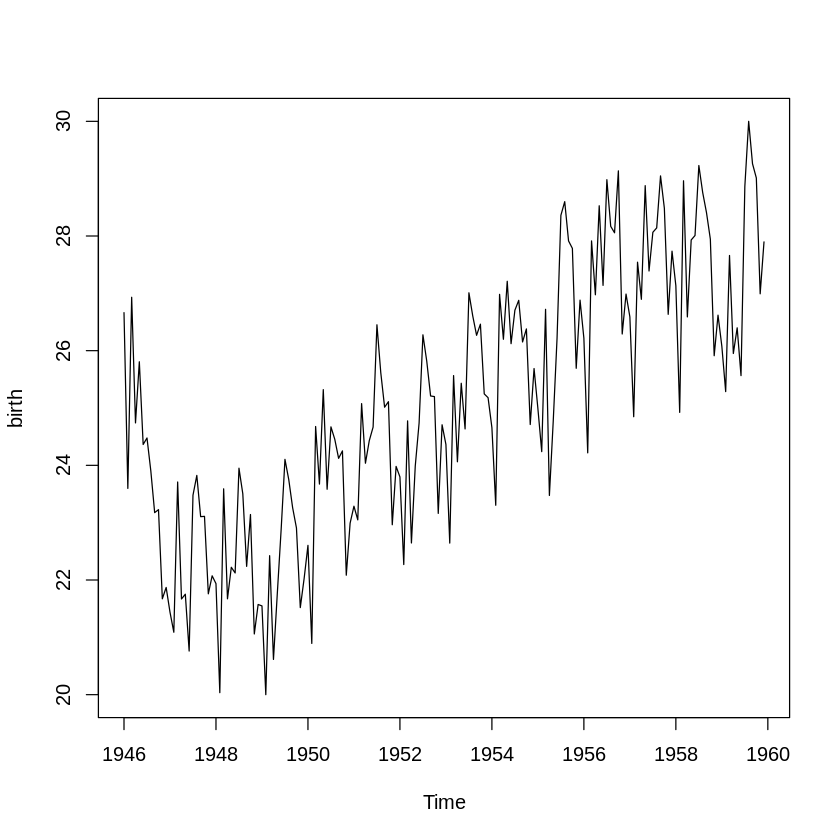

In [7]:
plot(birth)

전반적인 추세도 조금 있는 것 같고, 계절성이 있는 것 같아요.

평균과 분산이 시간에 따라 달라지는 것으로 관찰되는데 정상성을 만족하진 않는 자료인것 같습니다.

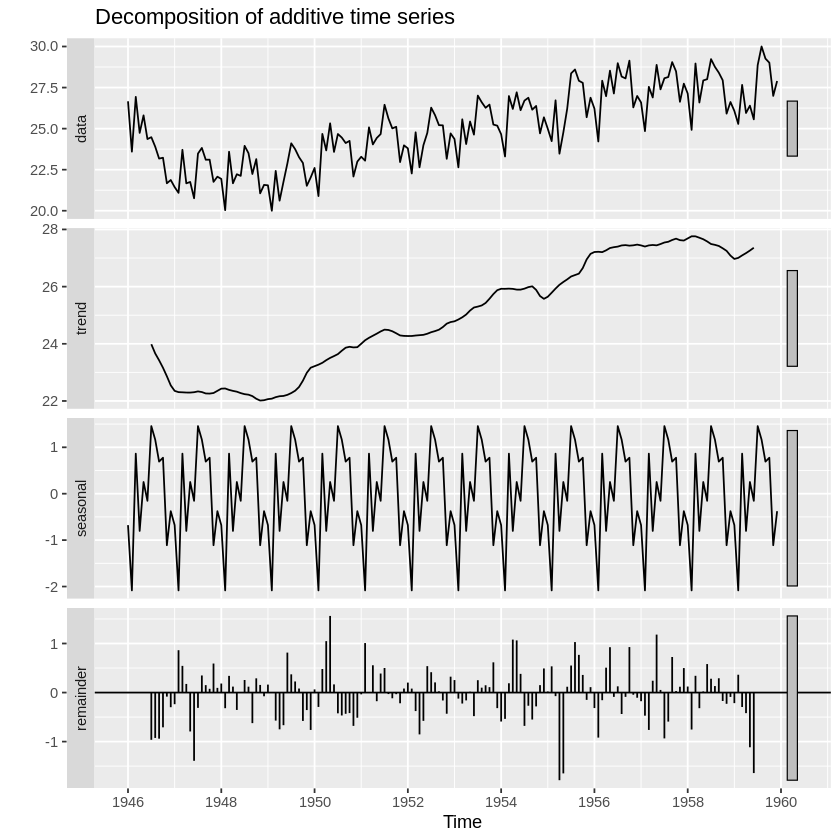

In [8]:
autoplot(decompose(birth))

시계열 자료를 원 데이터, 트렌드, 계절성, 그외 오차로 나눠주는 autoplot(decompose()) 함수 입니다.

자료를 시각적으로 보기 매우 좋은 것 같아요.

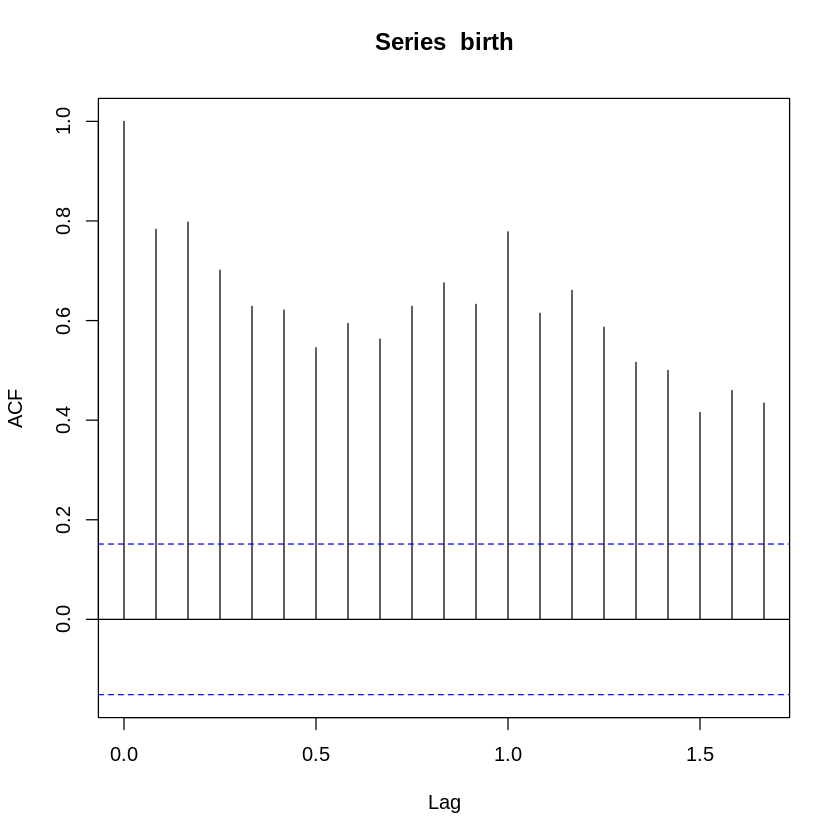

In [11]:
acf(birth, lag.max=20)

acf 자기상관계수 입니다. 빠르게 감소하는 지점이 있다면 MA를 쓰는게 좋으나 그렇지 않아 보입니다.

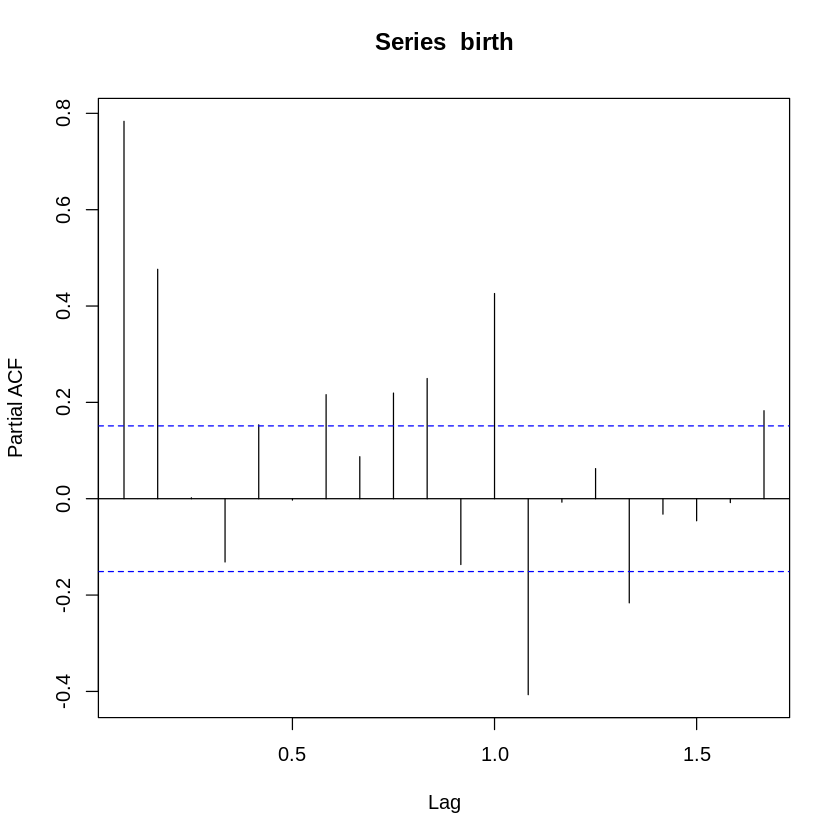

In [13]:
pacf(birth, lag.max=20)

pacf 편자기상관계수 입니다. 빠르게 감소하는 지점이 있다면 AR을 쓰는 것이 적절합니다.

# AR 모델 적합

In [16]:
fit <- ar(birth, method = 'mle')
fit

Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”
Warning message in arima0(x, order = c(i, 0L, 0L), include.mean = demean):
“possible convergence problem: optim gave code = 1”



Call:
ar(x = birth, method = "mle")

Coefficients:
      1        2        3        4        5        6        7        8  
 0.4043   0.2923  -0.0888  -0.0623   0.0544  -0.0443  -0.0171  -0.0640  
      9       10       11       12  
 0.1755   0.1134  -0.2982   0.5094  

Order selected 12  sigma^2 estimated as  0.8879

자동으로 P값을 정해서 계산해줍니다.

In [38]:
est.1 <- arima(birth, order = c(11,0,0), fixed = c(0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA))
est.1

Warning message in arima(birth, order = c(11, 0, 0), fixed = c(0, NA, NA, NA, NA, :
“some AR parameters were fixed: setting transform.pars = FALSE”



Call:
arima(x = birth, order = c(11, 0, 0), fixed = c(0, NA, NA, NA, NA, NA, NA, NA, 
    NA, NA, NA, NA))

Coefficients:
      ar1     ar2     ar3      ar4     ar5      ar6      ar7      ar8     ar9
        0  0.5759  0.1475  -0.1288  0.0248  -0.0355  -0.0245  -0.1414  0.1476
s.e.    0  0.0773  0.0818   0.0880  0.0871   0.0894   0.0907   0.0897  0.0897
        ar10     ar11  intercept
      0.3941  -0.0112    25.6374
s.e.  0.0816   0.0800     1.2054

sigma^2 estimated as 1.319:  log likelihood = -263.59,  aic = 551.18

order = (p,d,q) 이고 fixed는 0인경우 그 항의 계수를 사용하지 않고 NA인 경우 계수를 사용하겠다는 의미입니다.

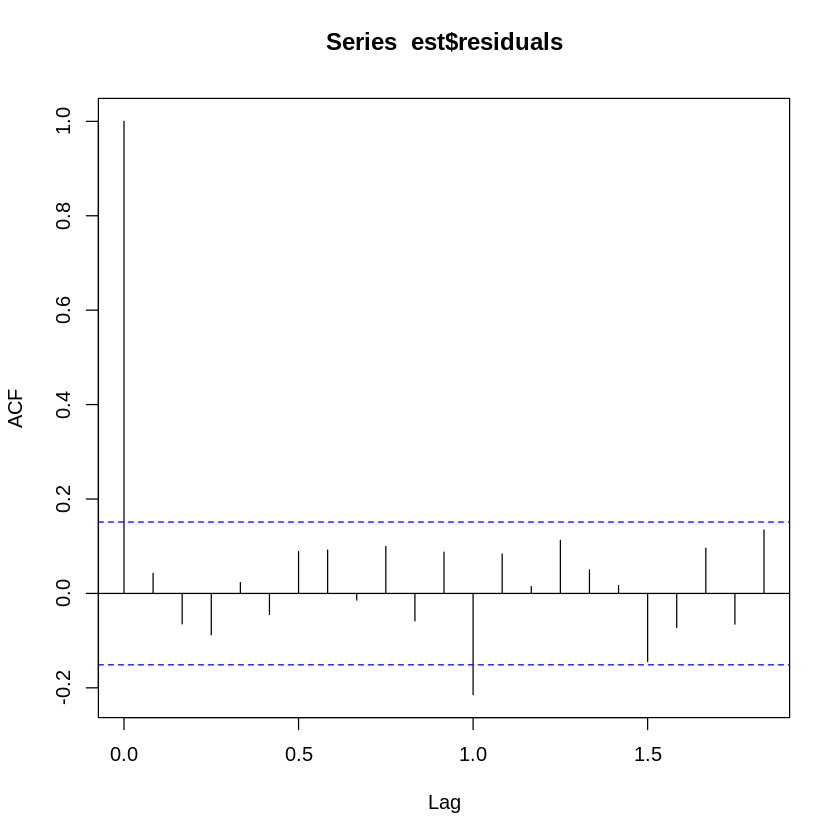

In [39]:
acf(est$residuals)

ACF 값이 안정회된 모습입니다.

In [42]:
Box.test(est$residuals)


	Box-Pierce test

data:  est$residuals
X-squared = 0.30321, df = 1, p-value = 0.5819


통계적 검증도 할 수 있습니다.

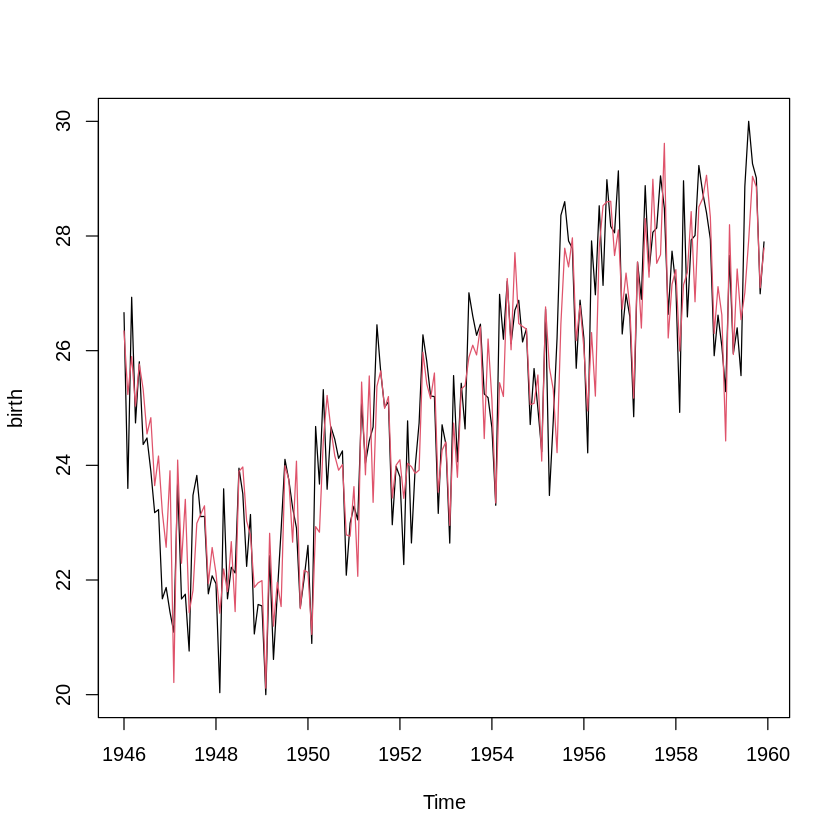

In [49]:
plot(birth, type = 'l')

lines(fitted(est), col = 2, lty = 1)

예측한 값을 그래프로 표현했습니다.

In [50]:
fitted(est, h = 3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,26.39963,24.84025,26.07144,25.12577,26.22498,24.46344,25.62999,24.50757,24.29708
1947,25.62441,22.54370,25.18824,22.03637,24.05069,22.91059,23.23670,22.26126,21.60718,22.83138,22.08378,22.79384
1948,22.55647,21.83367,23.23437,21.66766,21.93387,21.82316,23.70223,23.53885,23.31222,23.58903,22.09234,22.28697
1949,22.71987,20.63233,23.14931,21.52470,22.57879,22.01042,23.20781,22.89247,22.59651,23.66815,21.93154,22.83969
1950,22.21951,20.81767,22.75981,21.74831,22.83386,24.12212,25.20356,25.09516,23.69563,23.70509,22.50564,23.09822
1951,23.88766,22.16144,24.98893,23.51125,25.64303,23.99667,25.15761,24.15729,24.38610,25.20321,23.47784,24.36874
1952,24.38436,23.63832,24.98735,24.15418,24.32212,24.60992,25.34410,24.73596,24.71976,25.34774,23.78109,24.75321
1953,24.32585,22.72202,24.97050,23.41424,24.66142,25.16567,26.33526,25.78175,24.92267,25.88477,24.23444,25.65019
1954,25.37727,24.27083,25.75235,24.18496,25.68157,25.46286,27.66508,27.08732,26.73748,26.32181,25.21637,25.31379
1955,25.37057,24.11308,26.99524,25.63835,26.85388,25.90547,25.44878,25.33983,25.80368,27.18613,26.03324,27.22084


fitted 함수를 가지고 모델로 만든 예측값을 사용했습니다. h를 3으로 제한했기 때문에 앞 3개 값은 나올 수가 없습니다.

# MA 모델 적합

In [53]:
ma.est = arima(birth, order = c(0,0,9))
ma.est


Call:
arima(x = birth, order = c(0, 0, 9))

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6     ma7     ma8     ma9
      0.6346  0.9636  0.5796  0.9329  0.6558  0.7272  0.5426  0.2053  0.4116
s.e.  0.0728  0.1019  0.1162  0.1137  0.1242  0.1304  0.1380  0.1186  0.0779
      intercept
        25.0739
s.e.     0.5602

sigma^2 estimated as 1.244:  log likelihood = -261.17,  aic = 544.33

order = c(p, d, q) 에서 q값이 MA 개수를 결정합니다.

In [54]:
fitted(ma.est, h = 1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,25.95251,25.67143,25.40561,24.82399,26.19920,24.85453,24.84318,24.56051,23.66604,23.85843,22.47204,22.74461
1947,21.84185,21.66282,21.80943,23.05167,23.45515,21.67424,22.22553,22.93592,24.34254,23.68077,22.79472,23.63520
1948,21.75215,22.04347,21.34192,22.10192,23.88129,21.04898,23.39525,24.50027,23.74538,23.87659,22.05090,22.97825
1949,21.21271,20.77855,21.63952,21.70288,22.21829,21.45152,24.03647,24.66171,23.90069,24.40842,22.92290,22.43632
1950,21.67009,22.10285,22.36761,22.99342,25.27430,24.98947,25.48045,24.39333,25.02516,24.68061,22.67505,23.35984
1951,22.19523,23.37591,23.54196,24.50552,25.98286,23.95424,25.24065,26.22603,25.54268,25.34561,24.44959,24.05728
1952,23.30611,23.58397,23.01512,24.02431,23.98693,22.79686,26.13166,25.64112,26.16362,26.38574,24.02239,24.91265
1953,23.25952,23.93089,23.87380,23.50638,25.78781,24.67518,25.76932,26.51528,27.00995,26.64015,25.28893,25.92493
1954,24.85972,24.11851,23.56204,25.59806,27.34463,25.78523,27.48760,26.78627,26.53038,26.71510,24.66289,25.81467
1955,24.39575,24.44927,25.02809,25.43336,25.62500,23.56793,26.44265,27.81548,28.05461,28.43752,27.09566,27.21027


In [55]:
fitted(ma.est, h = 10)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,25.07392,25.07392
1947,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1948,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1949,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1950,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1951,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1952,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1953,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1954,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392
1955,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392,25.07392


h가 일정 수준 이상 커지면 MA 모델은 평균값으로 수렴합니다.

# ARIMA 모델 자동 적합

In [62]:
est <- auto.arima(birth, stepwise = FALSE, max.p = 12, max.q = 10)
est

Series: birth 
ARIMA(2,1,1)(1,1,1)[12] 

Coefficients:
         ar1     ar2      ma1     sar1     sma1
      0.4349  -0.241  -0.4999  -0.2474  -0.8465
s.e.  0.1846   0.085   0.1854   0.0986   0.1004

sigma^2 estimated as 0.406:  log likelihood=-157.78
AIC=327.56   AICc=328.12   BIC=345.82

auto.arima 함수를 가지고 자동으로 arima 작업을 했습니다.

이론적으로 p, q 값을 5 이하로 하는 것이 적당한데, 그에 맞는 결과입니다.

d값은 추세를 의미합니다.

In [63]:
fitted(est)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1946,26.64761,23.59349,26.92523,24.73763,25.80315,24.36295,24.47600,23.90066,23.17539,23.22730,21.67376,21.88578
1947,21.54343,19.36388,24.12830,21.13535,22.29703,20.42994,21.87548,23.07928,22.54888,22.71591,21.52740,22.16409
1948,21.69823,19.93556,23.14138,21.42456,22.19807,21.02772,23.25265,23.36304,22.38182,22.31920,21.64650,21.36331
1949,21.40590,19.95606,22.92007,20.36740,21.30675,20.88777,24.16941,23.37374,22.76478,23.29871,21.34524,22.00278
1950,21.89446,20.86780,23.86333,22.58268,24.01855,24.13627,24.79698,24.52997,23.73809,24.46630,22.48823,22.58123
1951,23.01638,21.62586,25.75329,22.76266,24.69739,23.99375,26.15594,26.02250,24.71870,25.22931,23.51161,23.49823
1952,24.15874,22.04979,25.46094,23.01360,23.79163,23.55099,26.06118,25.66630,24.91792,25.29679,23.45490,23.78538
1953,24.85942,22.82602,25.62198,24.11012,24.91516,24.91610,26.02685,26.60103,25.70685,26.28274,24.53334,25.73220
1954,25.09205,23.41113,26.34662,25.32678,26.84850,26.69116,27.42612,26.53563,26.46959,26.25946,24.49761,25.56646
1955,25.61437,23.52570,27.14373,24.89106,24.60156,24.94032,27.99554,27.51837,27.65685,27.69714,25.91558,26.36729


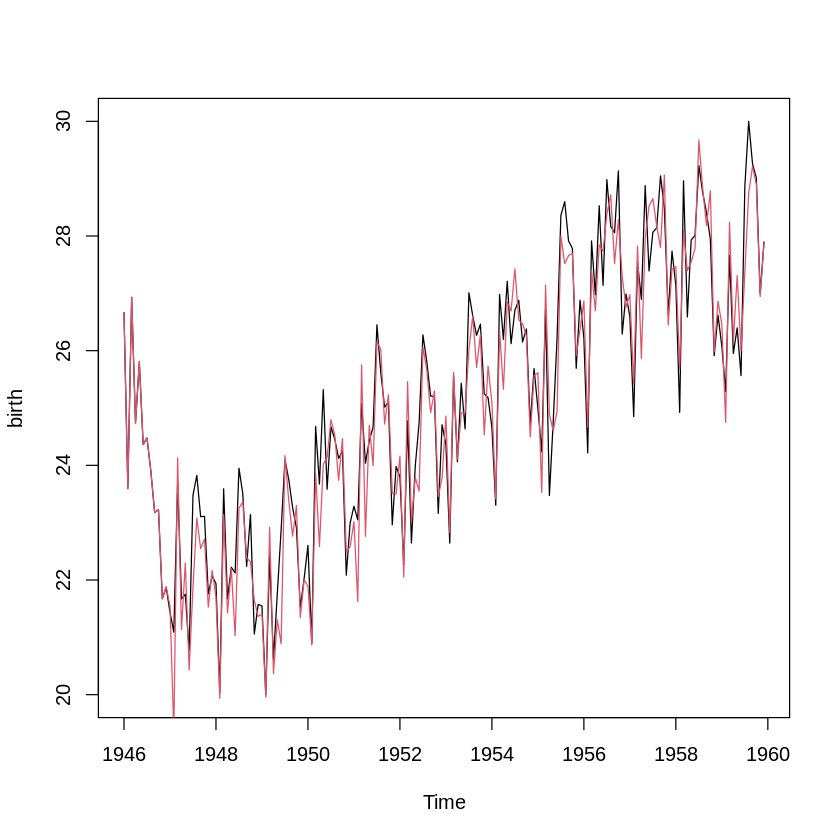

In [64]:
plot(birth, type = 'l')

lines(fitted(est), col = 2, lty = 1)

이전 모델보다 더 잘 적합된 모습입니다.

# 느낀점

간단한 ARIMA 모형에 대해서 공부했습니다.

AR와 MA가 무엇인지 부분적으로는 이해했는데 완벽히, 직관적으로, 누구에게 설명할 정도로 이해한 것 같진 않아서 조금 걱정입니다.

요즘 딥러닝으로 시계열 자료를 많이 예측합니다만 소규모 데이터 셋은 과적합 방지를 위해, 또 설명력을 가지기 위해 ARIMA 모델도 사용합니다.

시계열분석에 기초인 ARIMA 모델을 배워서 그동안 시계열 데이터를 보면 막막했던게 조금 사라진 것 같아요.